# Importy

In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import boto3
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
from pycaret.regression import setup, compare_models, tune_model, finalize_model, save_model
import pickle
from pycaret.regression import save_model, load_model
import numpy as np

load_dotenv()

True

# Połączenie z DOS

In [2]:
s3 = boto3.client(
    's3',
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    endpoint_url=os.getenv('AWS_ENDPOINT_URL')
    )

In [3]:
BUCKET_NAME = "halfmarathon-city"

# Wysłanie plików do DOS

In [4]:
s3 = boto3.client(
    's3',
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    endpoint_url=os.getenv('AWS_ENDPOINT_URL')
)

file_path = r'C:\Users\Administrator\Desktop\GOTOIT\Moduł 9\modul_9_zad_1\halfmarathon_wroclaw_2024__final.csv'

object_name = 'halfmarathon_wroclaw_2024__final.csv'

with open(file_path, 'rb') as f:
    s3.upload_fileobj(f, BUCKET_NAME, object_name)

print("Plik został wysłany.")

Plik został wysłany.


# Wczytanie csv jako DataFrame

In [5]:
response = s3.get_object(Bucket=BUCKET_NAME, Key=object_name)
csv_bytes = response['Body'].read()

df = pd.read_csv(BytesIO(csv_bytes), sep=';', encoding='utf-8')

print("Wczytano dane")
display(df.sample(n=10))

Wczytano dane


,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
1402,1403.0,92,BARTOSZ,STROZEK,WROCŁAW,POL,KURACJUSZE,M,1303.0,M40,...,4.733333,01:12:34,1564.0,4.850000,01:37:24,1411.0,4.966667,0.004533,01:43:00,4.882674
9346,9347.0,10561,WIOLETTA,ZDANCEWICZ,WODZISŁAW ŚLĄSKI,POL,NaN,K,2569.0,K50,...,6.433333,01:40:16,8773.0,6.966667,02:20:43,9103.0,8.090000,0.096867,02:32:34,7.232362
2383,2384.0,3554,MARIUSZ,SŁOMSKI,OŁPINY,POL,ŻUROWA BIEGA,M,2159.0,M50,...,5.016667,01:16:41,2590.0,5.176667,01:42:55,2370.0,5.246667,0.009400,01:49:03,5.169471
2689,2690.0,3649,DAWID,MACHAŁA,WROCŁAW,POL,NaN,M,2411.0,M20,...,5.326667,01:19:02,3238.0,5.303333,01:45:00,2786.0,5.193333,0.000533,01:50:38,5.244529
12475,NaN,79200,JAKUB,SZCZEPANKIEWICZ,NaN,NaN,NaN,M,NaN,M30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6783,6784.0,11334,PRZEMYSŁAW,LITWINIUK,WROCŁAW,POL,NaN,M,5403.0,M30,...,5.896667,01:31:39,7089.0,6.266667,02:03:16,6782.0,6.323333,0.016800,02:10:41,6.194991
11283,NaN,26492,DOMINIK,KOLODZIEJSKI,NaN,NaN,NaN,M,NaN,M40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12989,NaN,6845,JACEK,ŻMUDZIŃSKI,NaN,NaN,Ks Kabaczki,M,NaN,M40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNS,NaN
2698,2699.0,5002,ANDRZEJ,DEMKOWSKI,LUBIN,POL,NaN,M,2420.0,M40,...,4.896667,01:15:14,2232.0,5.433333,01:44:06,2632.0,5.773333,0.074133,01:50:41,5.246899
3247,3248.0,4393,ELŻBIETA,TUREK,GARWOLIN,POL,VICTUS RĘBKÓW,K,369.0,K40,...,5.360000,01:20:25,3593.0,5.560000,01:47:58,3380.0,5.510000,0.024800,01:53:46,5.393063


# Czyszczenie danych

In [6]:
print(list(df.columns))

['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj', 'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa', 'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas', '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open', '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo', '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność', 'Czas', 'Tempo']


In [7]:
len(df)

13007

In [8]:
# usunięcie spacji w nagłówkach , wierszy z NaN, niepotrzebnych kolumn
df.columns = df.columns.str.strip()
df = df[['Płeć', 'Rocznik', '5 km Czas', '5 km Tempo', 'Czas']].dropna()
print(df)

      Płeć  Rocznik 5 km Czas  5 km Tempo      Czas
0        M   1998.0  00:15:06    3.020000  01:04:03
1        M   1997.0  00:15:06    3.020000  01:04:24
2        M   1998.0  00:15:06    3.020000  01:04:40
3        M   1997.0  00:15:47    3.156667  01:09:44
4        M   1992.0  00:15:07    3.023333  01:10:05
...    ...      ...       ...         ...       ...
10294    K   1977.0  00:39:56    7.986667  03:17:46
10295    K   1948.0  00:43:30    8.700000  03:19:47
10296    K   1978.0  00:42:06    8.420000  03:21:08
10297    K   1955.0  00:49:20    9.866667  03:22:18
10298    K   1981.0  00:46:48    9.360000  03:28:32

[10004 rows x 5 columns]


In [9]:
print(df.dtypes)

Płeć           object
Rocznik       float64
5 km Czas      object
5 km Tempo    float64
Czas           object
dtype: object


In [10]:
# Sprawdzenie duplikatów
df.duplicated().sum()

3

In [11]:
# Usuwanie duplikatów
df = df.drop_duplicates()

In [12]:
# Odsetek brakujacych danych %
df.isna().sum() / len(df) * 100

Płeć          0.0
Rocznik       0.0
5 km Czas     0.0
5 km Tempo    0.0
Czas          0.0
dtype: float64

# Konwercja tempo/czas na sekundy - usunęcie outlierow

In [13]:
import pandas as pd

# ==== 1. Konwersja czasów na sekundy ====
df['czas_sec'] = pd.to_timedelta(df['Czas'], errors='coerce').dt.total_seconds()
df['5_km_czas_sec'] = pd.to_timedelta(df['5 km Czas'], errors='coerce').dt.total_seconds()
df['5_km_tempo_sec'] = df['5 km Tempo'] * 60   # min/km -> sekundy/km

# ==== 2. Usuwanie outlierów tylko dla 'czas_sec' ====
Q1 = df['czas_sec'].quantile(0.25)
Q3 = df['czas_sec'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask_czas = (df['czas_sec'] >= lower_bound) & (df['czas_sec'] <= upper_bound)

# ==== 3. Flaga outlierów ====
df['outlier_czas'] = ~mask_czas

# ==== 4. Utworzenie DataFrame bez outlierów ====
df_clean = df[mask_czas].copy()

# ==== 5. Odtworzenie czytelnych czasów po filtrze ====
df_clean['Czas_po_filtrze'] = pd.to_timedelta(df_clean['czas_sec'], unit='s').astype(str).str[-8:]
df_clean['5_km_Czas_po_filtrze'] = pd.to_timedelta(df_clean['5_km_czas_sec'], unit='s').astype(str).str[-8:]
df_clean['5_km_Tempo_po_filtrze'] = (df_clean['5_km_tempo_sec'] / 60).round(2)  # w min/km

# ==== 6. Podgląd ====
print("\nPełny DataFrame z flagami:")
print(df[['Czas','czas_sec','outlier_czas']].head())

print("\nOczyszczony DataFrame:")
print(df_clean[['Czas','czas_sec','Czas_po_filtrze',
                '5 km Czas','5_km_czas_sec','5_km_Czas_po_filtrze',
                '5 km Tempo','5_km_tempo_sec','5_km_Tempo_po_filtrze']].head())



Pełny DataFrame z flagami:
       Czas  czas_sec  outlier_czas
0  01:04:03    3843.0          True
1  01:04:24    3864.0          True
2  01:04:40    3880.0          True
3  01:09:44    4184.0          True
4  01:10:05    4205.0         False

Oczyszczony DataFrame:
       Czas  czas_sec Czas_po_filtrze 5 km Czas  5_km_czas_sec  \
4  01:10:05    4205.0        01:10:05  00:15:07          907.0   
5  01:10:18    4218.0        01:10:18  00:16:35          995.0   
6  01:10:48    4248.0        01:10:48  00:16:45         1005.0   
7  01:11:17    4277.0        01:11:17  00:15:23          923.0   
8  01:11:24    4284.0        01:11:24  00:16:37          997.0   

  5_km_Czas_po_filtrze  5 km Tempo  5_km_tempo_sec  5_km_Tempo_po_filtrze  
4             00:15:07    3.023333           181.4                   3.02  
5             00:16:35    3.316667           199.0                   3.32  
6             00:16:45    3.350000           201.0                   3.35  
7             00:15:23    3.076

# Obliczenia Wieku

In [14]:
df['wiek'] = 2024 - df['Rocznik']

# Encoding płci

In [15]:
le = LabelEncoder()
df['płeć_encoded'] = le.fit_transform(df['Płeć'])
print(df)

      Płeć  Rocznik 5 km Czas  5 km Tempo      Czas  czas_sec  5_km_czas_sec  \
0        M   1998.0  00:15:06    3.020000  01:04:03    3843.0          906.0   
1        M   1997.0  00:15:06    3.020000  01:04:24    3864.0          906.0   
2        M   1998.0  00:15:06    3.020000  01:04:40    3880.0          906.0   
3        M   1997.0  00:15:47    3.156667  01:09:44    4184.0          947.0   
4        M   1992.0  00:15:07    3.023333  01:10:05    4205.0          907.0   
...    ...      ...       ...         ...       ...       ...            ...   
10294    K   1977.0  00:39:56    7.986667  03:17:46   11866.0         2396.0   
10295    K   1948.0  00:43:30    8.700000  03:19:47   11987.0         2610.0   
10296    K   1978.0  00:42:06    8.420000  03:21:08   12068.0         2526.0   
10297    K   1955.0  00:49:20    9.866667  03:22:18   12138.0         2960.0   
10298    K   1981.0  00:46:48    9.360000  03:28:32   12512.0         2808.0   

       5_km_tempo_sec  outlier_czas  wi

# Finalny zbiór danych do modelu

In [17]:
df_model = df[['płeć_encoded', 'wiek', '5_km_tempo_sec', '5_km_czas_sec', 'czas_sec']].dropna()
print(df_model)

       płeć_encoded  wiek  5_km_tempo_sec  5_km_czas_sec  czas_sec
0                 1  26.0           181.2          906.0    3843.0
1                 1  27.0           181.2          906.0    3864.0
2                 1  26.0           181.2          906.0    3880.0
3                 1  27.0           189.4          947.0    4184.0
4                 1  32.0           181.4          907.0    4205.0
...             ...   ...             ...            ...       ...
10294             0  47.0           479.2         2396.0   11866.0
10295             0  76.0           522.0         2610.0   11987.0
10296             0  46.0           505.2         2526.0   12068.0
10297             0  69.0           592.0         2960.0   12138.0
10298             0  43.0           561.6         2808.0   12512.0

[10001 rows x 5 columns]


# Inicjalizacja środowiska Pycaret

In [18]:
exp = setup(
    data=df_model,
    target='czas_sec',
    session_id=123,
    verbose=False,
    fold=5
)

#  Porównanie modeli

In [19]:
best_models = exp.compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,297.0211,179113.8649,422.4779,0.8779,0.0673,0.0383,0.0400
gbr,Gradient Boosting Regressor,299.7257,170019.1052,411.7898,0.8841,0.0522,0.0391,0.1900
ridge,Ridge Regression,300.5434,174835.1250,417.3315,0.8808,0.0609,0.0391,0.0120
lr,Linear Regression,300.5435,174835.1375,417.3315,0.8808,0.0609,0.0391,1.1760
lar,Least Angle Regression,300.5436,174835.1750,417.3316,0.8808,0.0609,0.0391,0.0140
llar,Lasso Least Angle Regression,300.5521,174841.5469,417.3409,0.8808,0.0609,0.0391,0.0100
lasso,Lasso Regression,300.5522,174841.5531,417.3409,0.8808,0.0609,0.0391,0.9240
en,Elastic Net,300.5630,174848.9969,417.3526,0.8808,0.0610,0.0391,0.0140
br,Bayesian Ridge,300.5770,174860.0438,417.3667,0.8808,0.0611,0.0391,0.0120
omp,Orthogonal Matching Pursuit,300.6611,174912.0438,417.4344,0.8808,0.0611,0.0391,0.0100


# Tuning najlepszych modeli

In [20]:
tuned_best_models = [exp.tune_model(m, optimize="MAE") for m in best_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,308.4745,203984.2859,451.6462,0.8624,0.0568,0.0397
1,296.2164,210001.9927,458.2597,0.8575,0.1409,0.0380
2,292.8837,158786.0988,398.4797,0.8900,0.0500,0.0375
3,296.2720,174262.7530,417.4479,0.8839,0.0521,0.0379
4,287.9841,161468.0755,401.8309,0.8871,0.0511,0.0374
Mean,296.3661,181700.6412,425.5329,0.8762,0.0702,0.0381
Std,6.7680,21388.2326,24.9478,0.0135,0.0355,0.0008


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,342.2681,244727.6514,494.6996,0.8350,0.0621,0.0443
1,329.9478,211545.5550,459.9408,0.8565,0.0583,0.0429
2,331.1641,193814.0944,440.2432,0.8657,0.0557,0.0430
3,330.9015,201670.2158,449.0771,0.8656,0.0567,0.0430
4,313.9108,182376.6036,427.0557,0.8724,0.0542,0.0412
Mean,329.6384,206826.8241,454.2033,0.8590,0.0574,0.0429
Std,9.0652,21224.8635,22.9391,0.0131,0.0027,0.0010


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,311.6976,196970.3750,443.8134,0.8672,0.0562,0.0406
1,302.5811,204837.3281,452.5896,0.8610,0.0974,0.0393
2,297.6388,151829.1875,389.6526,0.8948,0.0493,0.0386
3,300.6425,164539.7500,405.6350,0.8904,0.0509,0.0389
4,290.1573,155998.3906,394.9663,0.8909,0.0505,0.0381
Mean,300.5435,174835.0062,417.3314,0.8808,0.0609,0.0391
Std,6.9984,21818.3040,25.8749,0.0139,0.0184,0.0008


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,311.6990,196972.2031,443.8155,0.8672,0.0562,0.0406
1,302.5798,204837.0000,452.5892,0.8610,0.0974,0.0393
2,297.6385,151828.6094,389.6519,0.8948,0.0493,0.0386
3,300.6425,164539.8594,405.6351,0.8904,0.0509,0.0389
4,290.1577,155998.0156,394.9659,0.8909,0.0505,0.0381
Mean,300.5435,174835.1375,417.3315,0.8808,0.0609,0.0391
Std,6.9987,21818.7611,25.8754,0.0139,0.0184,0.0008


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,311.6990,196972.2344,443.8156,0.8672,0.0562,0.0406
1,302.5802,204837.0312,452.5893,0.8610,0.0974,0.0393
2,297.9137,151836.1719,389.6616,0.8948,0.0493,0.0387
3,300.6426,164539.8906,405.6352,0.8904,0.0509,0.0389
4,290.1577,155998.0156,394.9659,0.8909,0.0505,0.0381
Mean,300.5986,174836.6688,417.3335,0.8808,0.0609,0.0391
Std,6.9766,21817.1784,25.8734,0.0139,0.0184,0.0008


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
best_model = exp.compare_models(best_models + tuned_best_models, sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
5,Huber Regressor,296.3661,181700.6412,425.5329,0.8762,0.0702,0.0381,0.0320
0,Huber Regressor,297.0211,179113.8649,422.4779,0.8779,0.0673,0.0383,0.0480
1,Gradient Boosting Regressor,299.7257,170019.1052,411.7898,0.8841,0.0522,0.0391,0.2000
6,Gradient Boosting Regressor,299.7257,170019.1052,411.7898,0.8841,0.0522,0.0391,0.1760
2,Ridge Regression,300.5434,174835.1250,417.3315,0.8808,0.0609,0.0391,0.0120
7,Ridge Regression,300.5434,174835.1250,417.3315,0.8808,0.0609,0.0391,0.0100
3,Linear Regression,300.5435,174835.1375,417.3315,0.8808,0.0609,0.0391,0.0100
8,Linear Regression,300.5435,174835.1375,417.3315,0.8808,0.0609,0.0391,0.0100
4,Least Angle Regression,300.5436,174835.1750,417.3316,0.8808,0.0609,0.0391,0.0120
9,Least Angle Regression,300.5436,174835.1750,417.3316,0.8808,0.0609,0.0391,0.0100


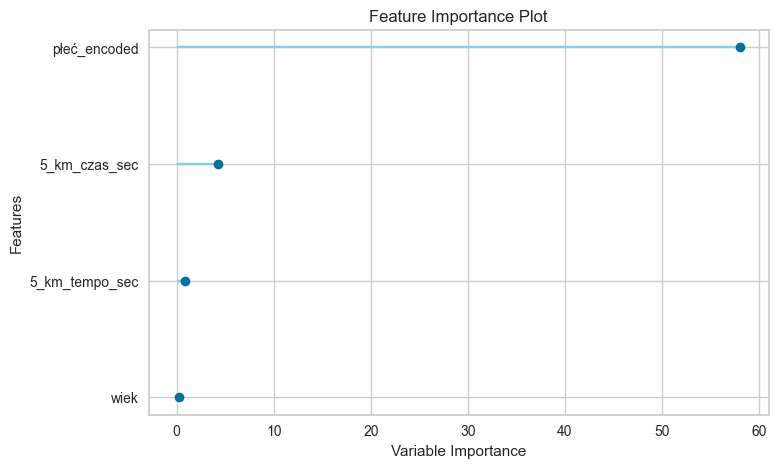

In [22]:
exp.plot_model(best_model, plot="feature")

# Sprawdzenie modelu na danych testowych / ewaluacja

In [23]:
exp.predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,294.5309,174293.2168,417.4844,0.8794,0.0526,0.0380


,płeć_encoded,wiek,5_km_tempo_sec,5_km_czas_sec,czas_sec,prediction_label
2684,0,34.0,316.200012,1581.0,6636.0,6904.119074
449,1,35.0,255.800003,1279.0,5584.0,5518.290242
8603,0,30.0,397.399994,1987.0,8635.0,8688.546898
336,1,50.0,251.000000,1255.0,5452.0,5415.969463
4223,1,34.0,330.000000,1650.0,7080.0,7149.456884
...,...,...,...,...,...,...
8428,1,55.0,378.200012,1891.0,8536.0,8213.693482
6110,1,40.0,340.200012,1701.0,7623.0,7375.002115
8980,1,44.0,420.000000,2100.0,8872.0,9130.362932
581,1,32.0,268.399994,1342.0,5680.0,5794.674514


# Finalizacja modelu

In [24]:
best_final_model = exp.finalize_model(best_model)
best_final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['płeć_encoded', 'wiek',
                                             '5_km_tempo_sec',
                                             '5_km_czas_sec'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', HuberRegressor(alpha=0.01, epsilon=1.1))])

# Zapisanie i upload modelu

In [25]:
# 1. Zapisz model przez pycaret (tworzy plik model_pycaret.pkl)
save_model(best_final_model, "model_pycaret")

# 2. Załaduj go z powrotem jako czysty obiekt (Pipeline/Estimator)
loaded_model = load_model("model_pycaret")

# 3. Zapisz czysty obiekt pickle (ten będzie miał .predict)
with open("model_pycaret.pkl", "wb") as f:
    pickle.dump(loaded_model, f)

# 4. Wrzuć do S3
with open("model_pycaret.pkl", "rb") as f:
    s3.upload_fileobj(f, BUCKET_NAME, "model_pycaret.pkl")


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
